In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Ps7 (Social_Network_Ads_Synthetic).csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,75682867,Male,26,47591,0
1,66755036,Male,55,108583,0
2,66882282,Male,39,115318,1
3,31081788,Female,19,24833,1
4,23315092,Female,41,22896,1


In [3]:
df.Purchased.value_counts()

Purchased
0    515
1    485
Name: count, dtype: int64

In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

count    1000.000000
mean       38.486000
std        12.089001
min        18.000000
25%        28.000000
50%        38.000000
75%        49.000000
max        59.000000
Name: Age, dtype: float64


<Axes: ylabel='Age'>

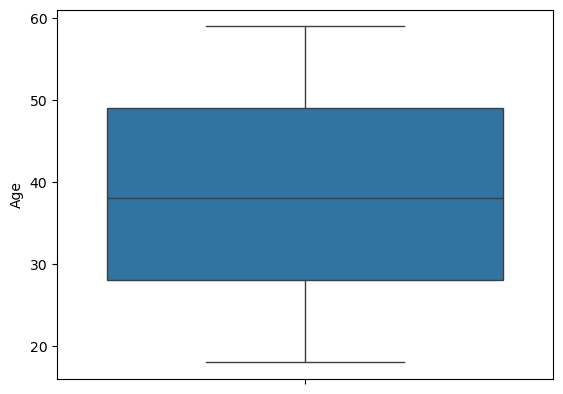

In [5]:
 print(df["Age"].describe())
 sns.boxplot(data=df["Age"])

In [8]:
df.loc[ df["Gender"] == "Male", "Gender"] = 0
df.loc[ df["Gender"] == "Female", "Gender"] = 1
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,75682867,0,26,47591,0
1,66755036,0,55,108583,0
2,66882282,0,39,115318,1
3,31081788,1,19,24833,1
4,23315092,1,41,22896,1
...,...,...,...,...,...
995,60676914,0,24,46897,0
996,36704425,1,52,65961,0
997,71298111,1,45,83703,1
998,55014515,1,31,59757,0


In [10]:
# Drop user ID as it is unique for each user
df.drop(["User ID"], axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,26,47591,0
1,0,55,108583,0
2,0,39,115318,1
3,1,19,24833,1
4,1,41,22896,1
...,...,...,...,...
995,0,24,46897,0
996,1,52,65961,0
997,1,45,83703,1
998,1,31,59757,0


In [11]:
 from sklearn.model_selection import train_test_split
 X = np.asarray(df.drop(["Purchased"], axis=1))
 y = np.asarray(df["Purchased"])
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3)
 from sklearn.linear_model import LogisticRegression
 model = LogisticRegression()
 model.fit(X_train, y_train)
 LogisticRegression()
 y_pred = model.predict(X_test)
 from sklearn.metrics import accuracy_score
 accuracy = accuracy_score(y_test, y_pred)
 accuracy

0.52

In [13]:
tp = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 0) & (y_test == 1)).sum()
tn = ((y_pred == 1) & (y_test == 1)).sum()
fn = ((y_pred == 1) & (y_test == 0)).sum()
recall = tp/(tp + fn)
accuracy = (tp + tn)/(tp + fp + tn + fn)
precision = tp / (tp + fp)
error = 1 - accuracy
f1 = (2 * recall * precision)/(recall + precision)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)

Recall:  0.5660377358490566
Precision:  0.5454545454545454
Accuracy:  0.52
F1 Score:  0.5555555555555556
